In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Train1 = pd.read_csv('X_train_80_20_KNN_RFE.csv')

In [3]:
Train2 = pd.read_csv('y_train_80_20_KNN_RFE.csv')

In [4]:
Test1 = pd.read_csv('X_test_80_20_KNN_RFE.csv')

In [5]:
Test2 = pd.read_csv('y_test_80_20_KNN_RFE.csv')

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


pipe_steps = [('scaler', StandardScaler()), ('decisionTree', DecisionTreeClassifier())]
check_params  = { 'decisionTree__criterion': ['gini', 'entropy'],
                  'decisionTree__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)
print(pipeline)

from tqdm import tqdm_notebook 

for cv in tqdm_notebook(range(3,10)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(Train1, Train2)
    print("score for %d fold CV := %3.2f" %(cv , create_grid.score(Test1, Test2)))
    print(create_grid.best_params_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('decisionTree', DecisionTreeClassifier())])


<ipython-input-6-4e325ae5c005>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cv in tqdm_notebook(range(3,10)):


  0%|          | 0/7 [00:00<?, ?it/s]

score for 3 fold CV := 0.81
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 12}
score for 4 fold CV := 0.82
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 13}
score for 5 fold CV := 0.81
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 6 fold CV := 0.82
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 7 fold CV := 0.81
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}
score for 8 fold CV := 0.81
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 13}
score for 9 fold CV := 0.82
{'decisionTree__criterion': 'entropy', 'decisionTree__max_depth': 14}


In [9]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

def confusion_matrix_and_metrics(model, y_test, preds, X_test):
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",xticklabels=['Act. pass', 'Act. fail'], yticklabels=['Pred. pass', 'Pred. fail']);
    print(classification_report(y_test, preds))


    print('Average Accuracy:', accuracy_score(y_test, preds))
    print('Average Balanced Accuracy:', balanced_accuracy_score(y_test, preds))

Accuracy = 0.80
Recall = 0.11

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       295
         1.0       0.04      0.11      0.06        19

    accuracy                           0.80       314
   macro avg       0.49      0.48      0.48       314
weighted avg       0.88      0.80      0.84       314

Average Accuracy: 0.802547770700637
Average Balanced Accuracy: 0.47636039250669043


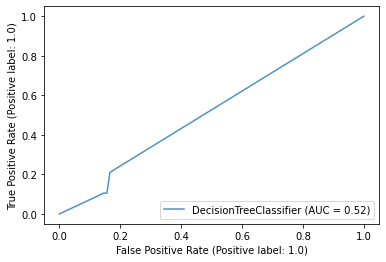

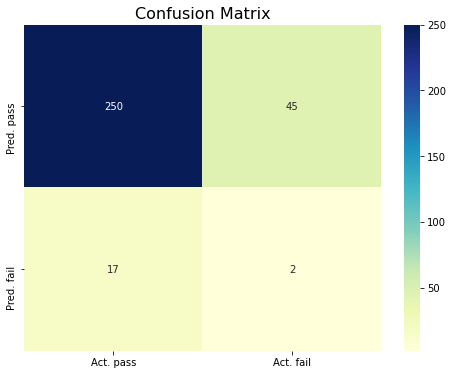

In [10]:
#DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_roc_curve

model = DecisionTreeClassifier(criterion='entropy', max_depth=14)
model.fit(Train1, Train2)
ax = plt.gca()
rfc_disp = plot_roc_curve(model, Test1,Test2, ax=ax, alpha=0.8)
preds = model.predict(Test1)

print(f'Accuracy = {accuracy_score(Test2, preds):.2f}\nRecall = {recall_score(Test2, preds):.2f}\n')

confusion_matrix_and_metrics(model,Test2, preds, Test1)
plt.show()